<a href="https://colab.research.google.com/github/marcbonastre/RepoTestGroup3/blob/master/PROYECTO_FINAL/Notebooks/BT_MLT_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reporte de MLT de Barcelona Telco

## Problema ha solucionar


Uno de los nuevos fichajes en el equipo ejecutivo, el CiSO (Jefe Seguridad y Privacidad) es un Portugués amante del vino,
específicamente de una variante llamada Vinho Verde. Resulta que como jefe de Seguridad y Privacidad tenemos encontronazos
varios debido a que él no cree en el ML tanto como el CEO y parece que hay una serie de rencillas. Para una demo VIP a unos board members sobre dispositivos y conectividad IoT para el mundo vinícola, al CEO se le ha ocurrido
montar una solución ML que permita que a partir de una serie de métricas químicas, que son escogidas live desde los viñedos,
podamos calcular la calidad futura del vino. Le gustaría que:

• Con el dataset de generación de energía:
1. Generar un modelo que sea capaz de predecir la calidad

• Información relevante que le gustaría saber al CEO:
• Dependiendo de los resultados preliminares, el CEO cree que podríamos crear una solución web rápida para
visualizar la información.

## Data

In [ ]:
import time
import matplotlib.pyplot as plt
import seaborn as sns  
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/sergiakalorth/MachineLearning-CIM-UPC/master/Final%20Project/datasets/Wine/winequality-red.csv',header=0,sep=',')
print(df.shape)

(1599, 12)


In [ ]:
df.head

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0.3

## Data Exploration

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

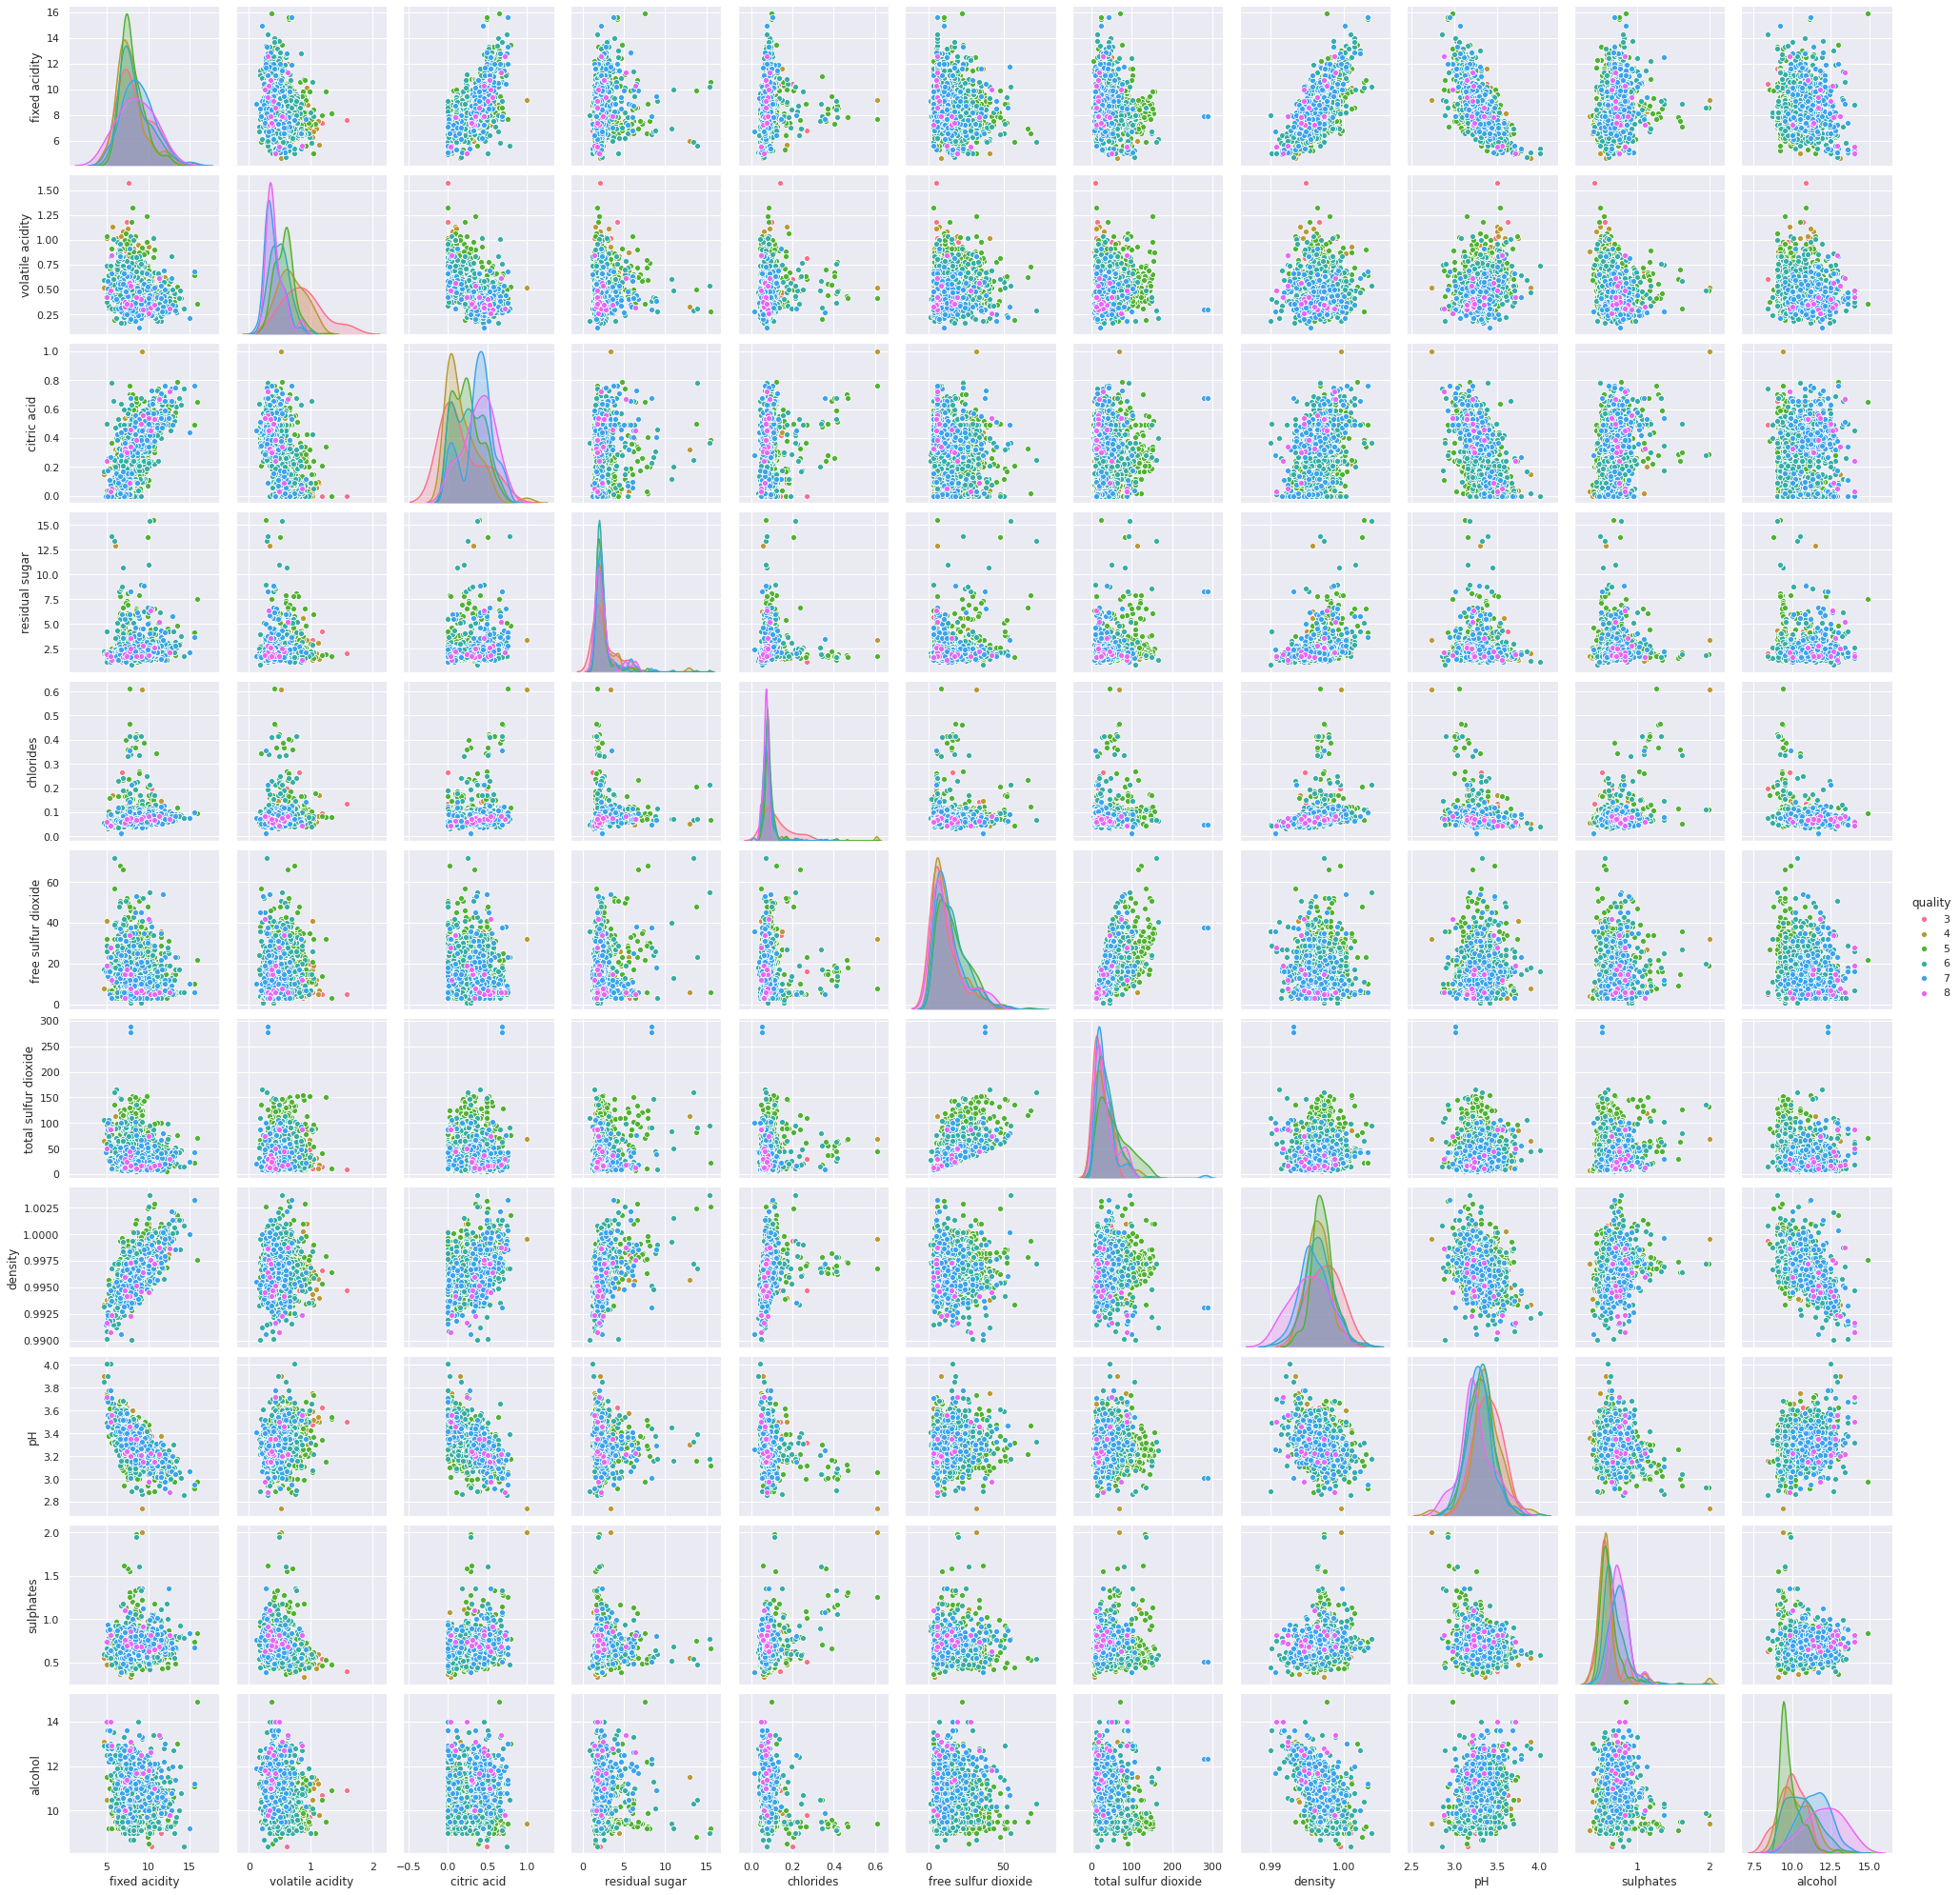

In [ ]:
sns.pairplot(df, hue="quality", palette="husl")

## Algoritmo de Machine Learning

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

Y = df['quality']
data = df.drop(['quality'],axis=1)
X = data.values

X, Y = shuffle(X,Y)
x_train = []
y_train = []
x_test = []
y_test = []

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9,random_state=30)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

print(x_train.shape)
print(x_test.shape)

(1439, 11)
(160, 11)


### AutoML

In [ ]:
!apt-get install swig -y
!pip install Cython numpy
!pip install auto-sklearn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
swig is already the newest version (3.0.12-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
import autosklearn.classification
import sklearn.model_selection


automl = autosklearn.classification.AutoSklearnClassifier(
          time_left_for_this_task=1200, 
          per_run_time_limit=300,
          )
automl.fit(x_train, y_train)
print(automl.show_models())

[(0.260000, SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'classifier:__choice__': 'adaboost', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'quantile_transformer', 'feature_preprocessor:__choice__': 'extra_trees_preproc_for_classification', 'classifier:adaboost:algorithm': 'SAMME', 'classifier:adaboost:learning_rate': 0.433235479452316, 'classifier:adaboost:max_depth': 10, 'classifier:adaboost:n_estimators': 496, 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.22971812945532427, 'data_preprocessing:numerical_transformer:rescaling:quantile_transformer:n_quantiles': 1000, 'data_preprocessing:numerical_transformer:rescaling:quant

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report

RFC = RandomForestClassifier(max_depth = 10, min_samples_split = 8, n_estimators = 3000,random_state = 15, n_jobs = -1)
RFC.fit(x_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=3000,
                       n_jobs=-1, oob_score=False, random_state=15, verbose=0,
                       warm_start=False)

## Resultados

### AutoML

In [ ]:
y_train_predict = automl.predict(x_train)
train_acc = sklearn.metrics.accuracy_score(y_train, y_train_predict)
print("Train Accuracy score {0}".format(train_acc))


y_test_predict = automl.predict(x_test)
test_acc = sklearn.metrics.accuracy_score(y_test, y_test_predict)
print("Test Accuracy score {0}".format(test_acc))

print(automl.sprint_statistics())

Train Accuracy score 0.8999305072967339
Test Accuracy score 0.7125
auto-sklearn results:
  Dataset name: 33829585671ed708e2239656bba1dec6
  Metric: accuracy
  Best validation score: 0.680000
  Number of target algorithm runs: 153
  Number of successful target algorithm runs: 135
  Number of crashed target algorithm runs: 11
  Number of target algorithms that exceeded the time limit: 0
  Number of target algorithms that exceeded the memory limit: 7



### Random Forest

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

train_prediction = RFC.predict(x_train)
print("La accuracy train es de {}.".format(accuracy_score(y_train,train_prediction)))
print(classification_report(y_train, train_prediction))
score_train = RFC.score(x_train,y_train)
print('Score train: {}'.format(score_train))
print("")
test_prediction = RFC.predict(x_test)
print("La accuracy test es de {}.".format(accuracy_score(y_test,test_prediction)))
print(classification_report(y_test, test_prediction))
score_test = RFC.score(x_test,y_test)
print('Score test: {}'.format(score_test))

La accuracy train es de 0.8811674774148714.
              precision    recall  f1-score   support

           3       1.00      0.20      0.33        10
           4       1.00      0.25      0.40        48
           5       0.88      0.94      0.91       609
           6       0.86      0.93      0.90       582
           7       0.95      0.80      0.87       174
           8       1.00      0.06      0.12        16

    accuracy                           0.88      1439
   macro avg       0.95      0.53      0.59      1439
weighted avg       0.89      0.88      0.87      1439

Score train: 0.8811674774148714

La accuracy test es de 0.7125.
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         5
           5       0.77      0.88      0.82        72
           6       0.63      0.64      0.64        56
           7       0.71      0.60      0.65        25
           8       0.00      0.00      0.00         2

    accuracy           

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Score test: 0.7125


 ## Discusión y Conclusiones

## Linias de desarrollo futuro

### Annexo 1 : Guardar y/o cargar el modelo


In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [ ]:
#import joblib
#filename = '/content/gdrive/My Drive/Colab Notebooks/Projecte Final IML/Modelos/model_Wine_AutoIML.pkl'
#joblib.dump(automl, filename)

In [ ]:
#joblib.load(automl,filename)

### Annexo 2 : Ejemplo

In [ ]:
print("Los valores de {} son max: {} i min: {}".format(df.columns[0], df[df.columns[0]].max(), df[df.columns[0]].min()))
print("Los valores de {} son max: {} i min: {}".format(df.columns[1], df[df.columns[1]].max(), df[df.columns[1]].min()))
print("Los valores de {} son max: {} i min: {}".format(df.columns[2], df[df.columns[2]].max(), df[df.columns[2]].min()))
print("Los valores de {} son max: {} i min: {}".format(df.columns[3], df[df.columns[3]].max(), df[df.columns[3]].min()))
print("Los valores de {} son max: {} i min: {}".format(df.columns[4], df[df.columns[4]].max(), df[df.columns[4]].min()))
print("Los valores de {} son max: {} i min: {}".format(df.columns[5], df[df.columns[5]].max(), df[df.columns[5]].min()))
print("Los valores de {} son max: {} i min: {}".format(df.columns[6], df[df.columns[6]].max(), df[df.columns[6]].min()))
print("Los valores de {} son max: {} i min: {}".format(df.columns[7], df[df.columns[7]].max(), df[df.columns[7]].min()))
print("Los valores de {} son max: {} i min: {}".format(df.columns[8], df[df.columns[8]].max(), df[df.columns[8]].min()))
print("Los valores de {} son max: {} i min: {}".format(df.columns[9], df[df.columns[9]].max(), df[df.columns[9]].min()))
print("Los valores de {} son max: {} i min: {}".format(df.columns[10], df[df.columns[10]].max(), df[df.columns[10]].min()))

In [ ]:
fixedAcidity = 5
volatileAcidity = 0.12
citricAcid = 0.25
residualSugar = 2
chlorides = 0.3
freeSulfurDioxide = 25
totalSulfurDioxide = 10
density = 1
pH = 3.3
sulphates = 0.62
alcohol = 10.5
datosEjemplo = np.array([fixedAcidity,volatileAcidity,citricAcid,residualSugar,chlorides,freeSulfurDioxide,totalSulfurDioxide,density,pH,sulphates,alcohol])

In [ ]:
datosNuevos = datosEjemplo.reshape(1,-1)
#automl_wine = joblib.load('/content/gdrive/My Drive/Colab Notebooks/Projecte Final IML/Modelos/model_Wine_AutoIML.pkl')
score = automl.score(x_test,y_test)
print("Test score: {0:.2f} %".format(100 * score))
#print(automl_wine.sprint_statistics())
#print(automl_wine.show_models())
qualityEsperada = automl_wine.predict(datosNuevos)
print(qualityEsperada)

In [ ]:
datosNuevos = datosFerran.reshape(1,-1)
qualityEsperada = RFC.predict(datosNuevos)
score = RFC.score(x_test,y_test)
print("Test score: {0:.2f} %".format(100 * score))
print(qualityEsperada)

### Annexo 3 : Interfície CEO

imlpython.westeurope.cloudapp.azure.com:1880/ui